In [56]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [57]:
# EUmatch = pd.read_csv("/course/data/a2/games/EUmatch.csv")
# KRmatch = pd.read_csv("/course/data/a2/games/KRmatch.csv")
NAmatch = pd.read_csv("/course/data/a2/games/NAmatch.csv")

In [58]:
NAmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            5482 non-null   float64
 1   f_spell            5473 non-null   float64
 2   champion           5474 non-null   object 
 3   side               5493 non-null   object 
 4   assists            5472 non-null   float64
 5   damage_objectives  5499 non-null   float64
 6   damage_building    5457 non-null   float64
 7   damage_turrets     5461 non-null   float64
 8   deaths             5501 non-null   float64
 9   kda                5488 non-null   float64
 10  kills              5478 non-null   float64
 11  level              5476 non-null   float64
 12  time_cc            5444 non-null   float64
 13  damage_taken       5492 non-null   float64
 14  turret_kills       5473 non-null   float64
 15  vision_score       5476 non-null   float64
 16  damage_total       5760 

# Calculate kda by formula

In [59]:
#Calculate kda by formula.
for i in range(len(NAmatch)):
    # Check kda is nan or not, if it is nan, 
    # Then, check if kills, assists and deaths are nan, if all of them are not nan,
    # use formula to calculate.
    if NAmatch['kda'].isnull()[i]: 
        if not NAmatch['kills'].isnull()[i]:
            if not NAmatch['assists'].isnull()[i]:
                if not NAmatch['deaths'].isnull()[i]:
                    if NAmatch['deaths'][i]!=0:
                        NAmatch['kda'][i]=(NAmatch['kills'][i] + NAmatch['assists'][i])/ NAmatch['deaths'][i]
                    else:
                        NAmatch['kda'][i]=(NAmatch['kills'][i] + NAmatch['assists'][i])

/tmp/ipykernel_32/3529775585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAmatch['kda'][i]=(NAmatch['kills'][i] + NAmatch['assists'][i])/ NAmatch['deaths'][i]
/tmp/ipykernel_32/3529775585.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAmatch['kda'][i]=(NAmatch['kills'][i] + NAmatch['assists'][i])


In [60]:
NAmatch, test = train_test_split(NAmatch, test_size=0.33, random_state=1)

In [61]:
print(NAmatch.shape)
print(test.shape)

(3859, 20)
(1901, 20)


# Delete all nan and inf in the EUmatch dataset

<AxesSubplot:>

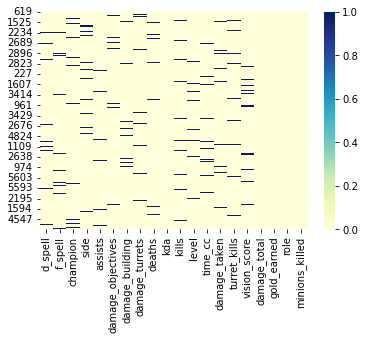

In [62]:
import seaborn as sb
sb.heatmap(NAmatch.isnull(),cmap="YlGnBu")

In [63]:
#check null values
NAmatch.isnull().sum()
NAmatch.drop_duplicates()
NAmatch.info()
NAmatch.head(10)
#cDelete all nan in the NAmatch dataset
#NAmatch.replace([np.inf, -np.inf], np.nan, inplace=True)
#na=NAmatch.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 619 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3657 non-null   float64
 1   f_spell            3664 non-null   float64
 2   champion           3674 non-null   object 
 3   side               3675 non-null   object 
 4   assists            3657 non-null   float64
 5   damage_objectives  3688 non-null   float64
 6   damage_building    3658 non-null   float64
 7   damage_turrets     3646 non-null   float64
 8   deaths             3681 non-null   float64
 9   kda                3836 non-null   float64
 10  kills              3667 non-null   float64
 11  level              3669 non-null   float64
 12  time_cc            3641 non-null   float64
 13  damage_taken       3692 non-null   float64
 14  turret_kills       3672 non-null   float64
 15  vision_score       3666 non-null   float64
 16  damage_total       385

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
619,7.0,4.0,NaN,Side.red,10.0,1205.0,4772.0,1205.0,8.0,1.250000,0.0,12.0,10.0,19402.0,0.0,64.0,28640,6993,Other,Few
2142,11.0,4.0,Viego,Side.blue,10.0,2324.0,29733.0,2324.0,5.0,3.200000,6.0,13.0,12.0,21744.0,1.0,25.0,124722,10655,TopLane_Jungle,Few
5537,12.0,4.0,Jayce,Side.red,NaN,3188.0,3188.0,3188.0,3.0,0.666667,1.0,13.0,2.0,9689.0,NaN,30.0,143395,8476,Other,Many
4437,12.0,4.0,Ziggs,Side.red,2.0,0.0,0.0,0.0,4.0,0.750000,1.0,9.0,16.0,9233.0,0.0,7.0,49477,5314,Other,Many
4537,4.0,12.0,Shen,Side.red,11.0,0.0,419.0,0.0,2.0,8.000000,5.0,15.0,31.0,15100.0,0.0,20.0,88679,8985,TopLane_Jungle,Many
216,7.0,4.0,Draven,Side.red,2.0,4679.0,11154.0,4679.0,2.0,4.000000,6.0,12.0,3.0,9671.0,2.0,7.0,118503,10520,Other,Many
4078,NaN,NaN,Vex,Side.red,4.0,1611.0,2137.0,1611.0,NaN,1.800000,5.0,12.0,24.0,12852.0,0.0,12.0,71063,7318,Other,Many
3159,4.0,12.0,Zoe,Side.blue,7.0,568.0,4799.0,568.0,9.0,1.111111,3.0,17.0,41.0,27735.0,0.0,72.0,137096,13222,Other,Many
4936,4.0,11.0,Talon,Side.red,10.0,3343.0,42679.0,3343.0,2.0,12.000000,14.0,18.0,5.0,34093.0,3.0,22.0,252611,17015,TopLane_Jungle,Few
2147,6.0,4.0,Garen,NaN,1.0,5048.0,5048.0,5048.0,3.0,2.333333,6.0,14.0,17.0,12666.0,2.0,14.0,96491,10998,TopLane_Jungle,Many


In [64]:
#drop all NaN values in kda
na = NAmatch.dropna(how='all', subset=['kda'])
na.isnull().sum()

d_spell              200
f_spell              195
champion             184
side                 184
assists              195
damage_objectives    170
damage_building      201
damage_turrets       212
deaths               175
kda                    0
kills                179
level                190
time_cc              218
damage_taken         165
turret_kills         186
vision_score         193
damage_total           0
gold_earned            0
role                   0
minions_killed         0
dtype: int64

In [65]:
#delete catergoryical data
#modify_data = modify_data.fillna(modify_data.mean())
#modify_data= modify_data.dropna()
#modify_data.head(5)
na = na.dropna(how='any',
                subset=['side', 'champion'])
na.isnull().sum()
na = na.fillna(na.median())
print(na.isnull().sum())
na.info()
#check if has inf value
na.isin([np.inf, -np.inf])
na.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
na.dropna(inplace=True)
na.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3477 entries, 2142 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3477 non-null   float64
 1   f_spell            3477 non-null   float64
 2   champion           3477 non-null   object 
 3   side               3477 non-null   object 
 4   assists            3477 non-null   float64
 5   damage_objectives  3477 non-null   float64
 6   damage_building    3477 non-

/tmp/ipykernel_32/3642110145.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  na = na.fillna(na.median())


**Role**

<AxesSubplot:ylabel='role'>

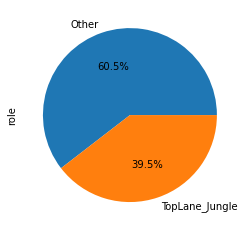

In [66]:
(na.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='role'>

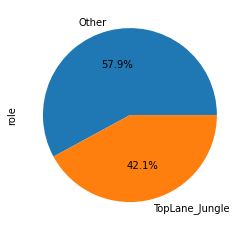

In [67]:
(test.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='role', ylabel='count'>

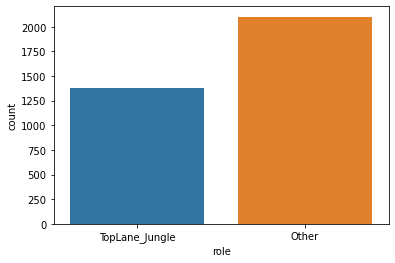

In [68]:
sns.countplot('role',data=na)

**Side**

In [69]:
side_count=(na.groupby(['side','role'])['role'].count())

In [70]:
side_count

side       role          
Side.blue  Other             1049
           TopLane_Jungle     676
Side.red   Other             1053
           TopLane_Jungle     699
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

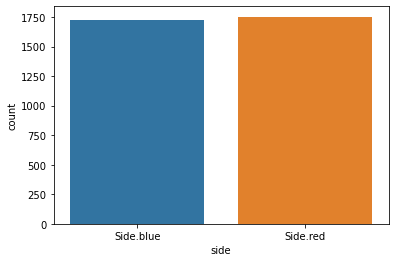

In [71]:
sns.countplot('side',data=na)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

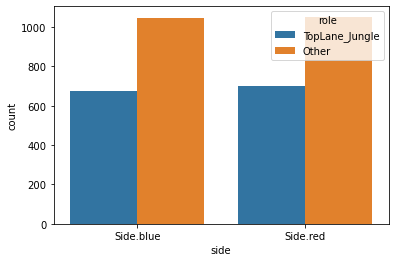

In [72]:
sns.countplot('side',hue='role',data=na)

In [73]:
minions_killed_count=(na.groupby(['minions_killed','role'])['role'].count())

In [74]:
minions_killed_count

minions_killed  role          
Few             Other              736
                TopLane_Jungle     721
Many            Other             1366
                TopLane_Jungle     654
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

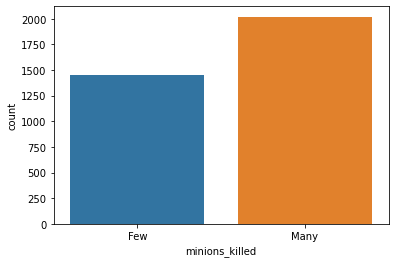

In [75]:
sns.countplot('minions_killed',data=na)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

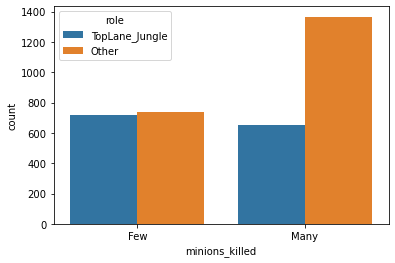

In [76]:
sns.countplot('minions_killed',hue='role',data=na)

# Convert category variable to factor

In [77]:
na['role']=na['role'].replace({'Other':0})
na['role']=na['role'].replace({'TopLane_Jungle':1})

In [78]:
# convert category variable to factor
na[['side','champion','minions_killed']] = na[['side','champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])

<AxesSubplot:ylabel='role'>

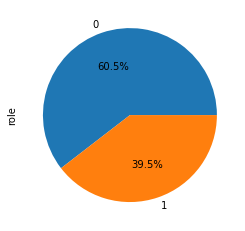

In [79]:
(na.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

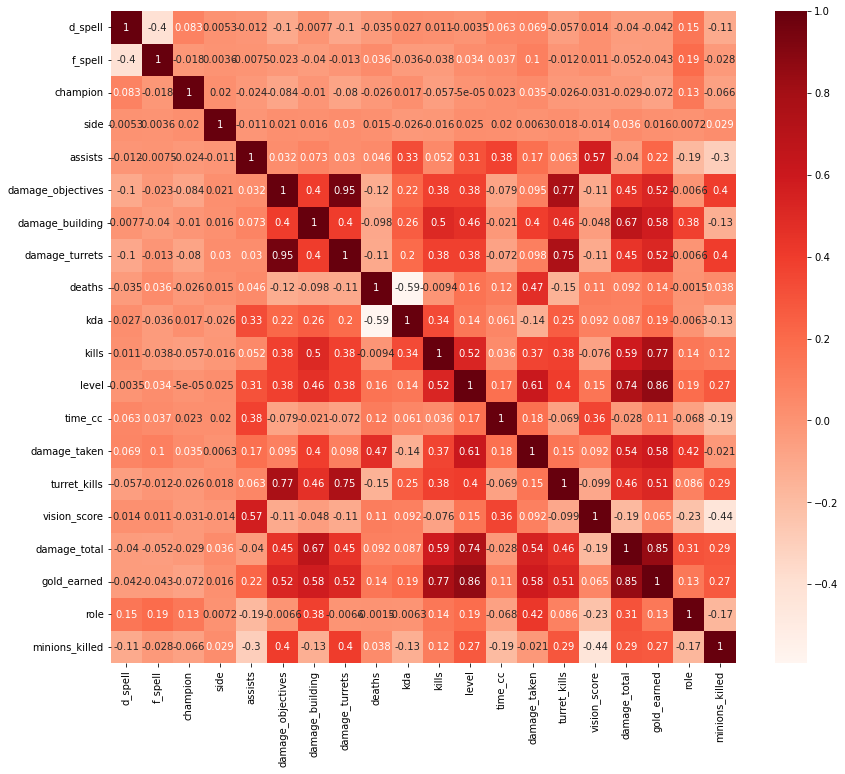

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = na.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Feature Selection - Chi-square test

In [81]:
y_train = na['role']
X_train = na.drop(columns=['role'])
print('Train', X_train.shape, y_train.shape)

Train (3477, 19) (3477,)


In [82]:
features = X_train
class_label = y_train
ALPHA = 0.05

In [83]:
import scipy.stats as stats

from scipy.stats import chi2_contingency
filtered_features = []

for feature in (X_train.columns):
    cont_table = pd.crosstab(class_label, features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features)

Chi2 value for feature "d_spell": 935.6742
Reject the Null Hypothesis for feature "d_spell", p-value 0.0000

Chi2 value for feature "f_spell": 927.8213
Reject the Null Hypothesis for feature "f_spell", p-value 0.0000

Chi2 value for feature "champion": 2623.6008
Reject the Null Hypothesis for feature "champion", p-value 0.0000

Chi2 value for feature "side": 0.1827
Fail to reject the Null Hypothesis for feature "side", p-value 0.6691

Chi2 value for feature "assists": 144.6746
Reject the Null Hypothesis for feature "assists", p-value 0.0000

Chi2 value for feature "damage_objectives": 2242.6413
Fail to reject the Null Hypothesis for feature "damage_objectives", p-value 0.0999

Chi2 value for feature "damage_building": 2996.9088
Reject the Null Hypothesis for feature "damage_building", p-value 0.0064

Chi2 value for feature "damage_turrets": 2222.9342
Fail to reject the Null Hypothesis for feature "damage_turrets", p-value 0.1239

Chi2 value for feature "deaths": 23.7400
Fail to reject 

In [84]:
from sklearn import preprocessing
X_train=X_train[filtered_features]
# X_scale=preprocessing.normalize(X_fs)

# Preprocessing test data

In [85]:
test.drop_duplicates()

test = test.dropna(how='all', subset=['kda'])
test.isnull().sum()

test = test.dropna(how='any',
                subset=['side', 'champion'])
test=test.fillna(test.median())
print(test.isnull().sum())
test.info()
#check if has inf value
test.isin([np.inf, -np.inf])
test.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
test.dropna(inplace=True)
test.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 473 to 4298
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            1714 non-null   float64
 1   f_spell            1714 non-null   float64
 2   champion           1714 non-null   object 
 3   side               1714 non-null   object 
 4   assists            1714 non-null   float64
 5   damage_objectives  1714 non-null   float64
 6   damage_building    1714 non-n

/tmp/ipykernel_32/1010060874.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test=test.fillna(test.median())


# category variable to factor


In [86]:
test['role']=test['role'].replace({'Other':0})
test['role']=test['role'].replace({'TopLane_Jungle':1})

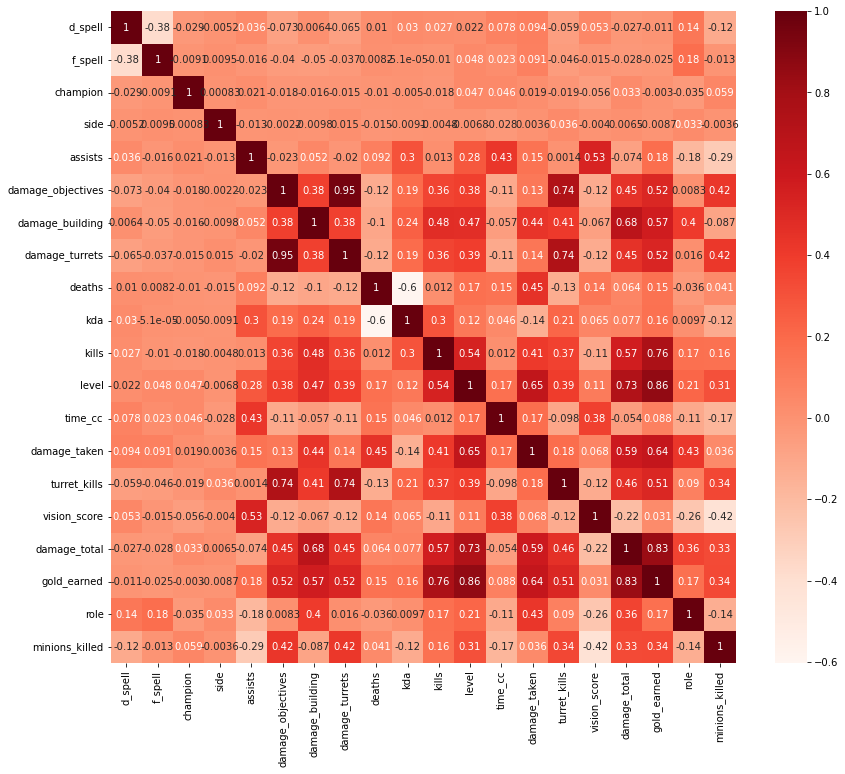

In [87]:
test[['side', 'champion','minions_killed']] = test[['side','champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(14,12))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Chi-square test

In [88]:
y_test = test['role']
X_test = test.drop(columns=['role'])
print('test', X_test.shape, y_test.shape)

test (1714, 19) (1714,)


In [89]:
features_test = X_test
class_label_test = y_test
ALPHA = 0.05

In [90]:
filtered_features_test = []

for feature in (X_test.columns):
     cont_table = pd.crosstab(class_label_test, features_test[feature])
     chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
     print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
     if(p < ALPHA): 
         filtered_features_test.append(feature)
         print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
     else:
         print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')  

Chi2 value for feature "d_spell": 417.1913
Reject the Null Hypothesis for feature "d_spell", p-value 0.0000

Chi2 value for feature "f_spell": 459.3140
Reject the Null Hypothesis for feature "f_spell", p-value 0.0000

Chi2 value for feature "champion": 1299.8169
Reject the Null Hypothesis for feature "champion", p-value 0.0000

Chi2 value for feature "side": 1.9186
Fail to reject the Null Hypothesis for feature "side", p-value 0.1660

Chi2 value for feature "assists": 75.4852
Reject the Null Hypothesis for feature "assists", p-value 0.0000

Chi2 value for feature "damage_objectives": 1213.4086
Fail to reject the Null Hypothesis for feature "damage_objectives", p-value 0.4109

Chi2 value for feature "damage_building": 1532.8569
Fail to reject the Null Hypothesis for feature "damage_building", p-value 0.1203

Chi2 value for feature "damage_turrets": 1211.5542
Fail to reject the Null Hypothesis for feature "damage_turrets", p-value 0.4497

Chi2 value for feature "deaths": 11.0928
Fail to 

In [91]:
X_test=test[filtered_features]
y_test = test['role']
print((X_test.shape),(X_train.shape))
print((y_test.shape),(y_train.shape))

(1714, 12) (3477, 12)
(1714,) (3477,)


# KNN

In [92]:

from sklearn.neighbors import KNeighborsClassifier
# Create and fit knn with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to the train dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
# Note that we're calculating the accuracy score for the test data
y_pred_knn = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.6861143523920653


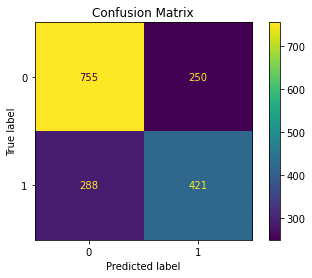

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_knn, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
precision_knn = metrics.precision_score(y_test, y_pred_knn)
recall_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn=(2*precision_knn*recall_knn)/(precision_knn+recall_knn)
print("F1:",f1_knn)

Accuracy: 0.6861143523920653
Precision: 0.6274217585692996
Recall: 0.5937940761636107
F1: 0.6101449275362318


In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

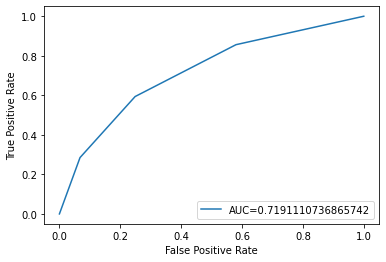

In [97]:
#AUC
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
# print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))

/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


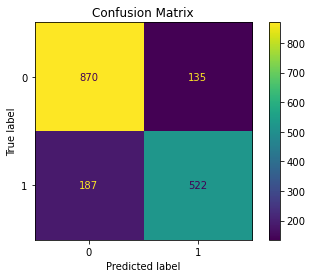

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_lr, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr=(2*precision_lr*recall_lr)/(precision_lr+recall_lr)
print("F1:",f1_lr)

Accuracy: 0.8121353558926487
Precision: 0.7945205479452054
Recall: 0.7362482369534555
F1: 0.7642752562225477


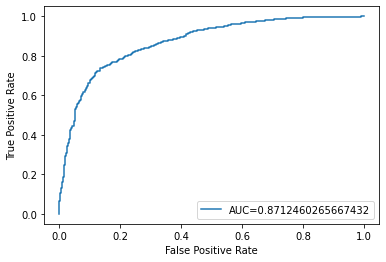

In [102]:
#AUC
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_lr))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree

In [103]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_dt,y_test))

The accuracy of the Logistic Regression is 0.8121353558926487


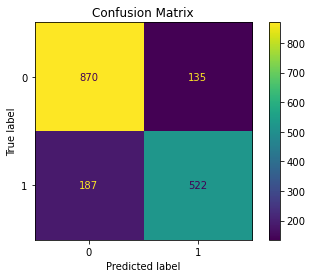

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_dt, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_dt=(2*precision_dt*recall_dt)/(precision_dt+recall_dt)
print("F1:",f1_dt)

Accuracy: 0.8121353558926487
Precision: 0.7945205479452054
Recall: 0.7362482369534555
F1: 0.7642752562225477


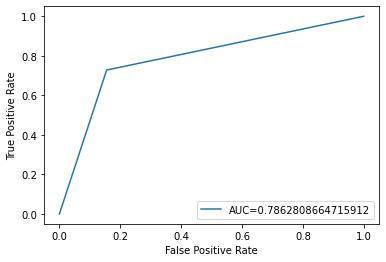

In [106]:
#AUC
y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
auc_dt = metrics.roc_auc_score(y_test, y_pred_proba_dt)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_dt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(y_pred_rf,y_test))

The accuracy of the Random Forest is 0.8623103850641773


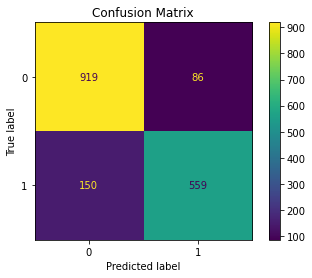

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_rf, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf=(2*precision_rf*recall_rf)/(precision_rf+recall_rf)
print("F1:",f1_rf)

Accuracy: 0.8623103850641773
Precision: 0.8666666666666667
Recall: 0.7884344146685472
F1: 0.8257016248153619


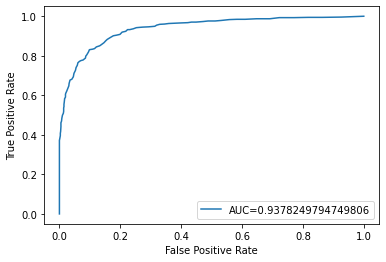

In [110]:
#AUC
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()